In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix_list.csv')

In [3]:
data.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       7008 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

In [5]:
#create dummy variables to contain all the genres each show is categorized as

#first, create a list of all unique genres
genres_list = []
for value in list(data.genres):
    genre_list = str(value).split(',')
    for genre in genre_list:
        if genre not in genres_list:
            genres_list.append(genre)
            
#add each genre as a column to the dataframe with value 0
for genre in genres_list:
    data[genre] = 0
    
#iterate through the original genres and change value to 1 for respective column
for row in data.genres.items():
    genre_list = str(row[1]).split(',')
    for genre in genre_list:
        for column in data.columns:
            if genre == column:
                data.loc[row[0], column] = 1

#drop null genre columns
data = data[['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'isAdult', 'cast',
       'image_url', 'Crime', 'Drama', 'Fantasy', 'Action', 'Horror', 'Comedy',
       'Romance', 'Thriller', 'Adventure', 'Mystery', 'Music', 'Animation',
       'Biography', 'History', 'Sci-Fi', 'Family', 'Sport', 'Musical', 'War',
       'Western', 'Reality-TV', 'Documentary', 'Game-Show', 'Short',
       'Film-Noir', 'Talk-Show', 'News']]

In [6]:
data.describe()

,startYear,endYear,episodes,rating,numVotes,isAdult,Crime,Drama,Fantasy,Action,...,Musical,War,Western,Reality-TV,Documentary,Game-Show,Short,Film-Noir,Talk-Show,News
count,6493.000000,1126.000000,2304.000000,6000.000000,6.000000e+03,7008.0,7008.000000,7008.000000,7008.000000,7008.000000,...,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.00000,7008.000000,7008.000000
mean,2015.606653,2016.613677,38.510851,6.696400,1.961778e+04,0.0,0.142409,0.406393,0.054795,0.175942,...,0.007420,0.006992,0.003567,0.028396,0.145548,0.004994,0.021119,0.00157,0.005422,0.002997
std,7.855886,5.195806,237.894838,1.209824,7.975237e+04,0.0,0.349494,0.491195,0.227595,0.380798,...,0.085826,0.083331,0.059625,0.166114,0.352678,0.070499,0.143790,0.03959,0.073442,0.054663
min,1932.000000,1969.000000,1.000000,1.700000,5.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2015.000000,2016.000000,8.000000,6.000000,3.040000e+02,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2017.000000,2018.000000,14.000000,6.800000,1.312000e+03,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2019.000000,2019.000000,30.000000,7.600000,6.166750e+03,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,2022.000000,2022.000000,8358.000000,9.700000,1.697849e+06,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
data.drop('isAdult', axis=1, inplace=True)

In [8]:
cleaned_data = data.drop(['plot', 'summary', 'genres', 'cast', 'image_url'], axis=1)

In [9]:
cleaned_data.to_csv('cleaned_data.csv')

In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       7008 non-null   object 
 11  rating         6000 non-null   float64
 12  numVotes       6000 non-null   float64
 13  Crime          7008 non-null   int64  
 14  Drama          7008 non-null   int64  
 15  Fantasy        7008 non-null   int64  
 16  Action         7008 non-null   int64  
 17  Horror         7008 non-null   int64  
 18  Comedy  

In [11]:
#We would like to take a look at the types of genres that Netflix offers, and how they have changed over the years.
#Initial hypothesis is that there is an increase in science fiction titles in the last 10 years, and the top genres of 
#movies and TV shows might differ.

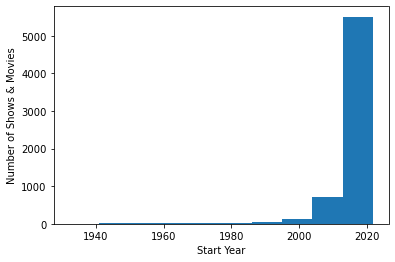

In [12]:
#Start Year of Listings

_ = plt.hist(cleaned_data['startYear'])
_ = plt.xlabel('Start Year')
_ = plt.ylabel('Number of Shows & Movies')
plt.show()

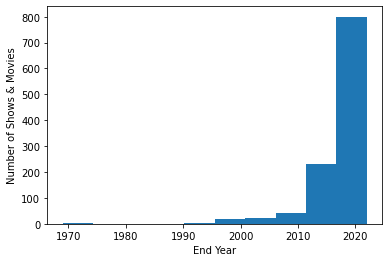

In [13]:
#End Year of Listings

_ = plt.hist(cleaned_data['endYear'])
_ = plt.xlabel('End Year')
_ = plt.ylabel('Number of Shows & Movies')
plt.show()

In [14]:
#Most listings on Netflix were produced in the last decade.

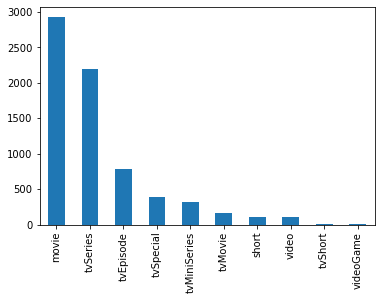

In [15]:
#Types of Listings that Netflix offers

_ = cleaned_data['type'].value_counts().plot(kind='bar')
plt.show()

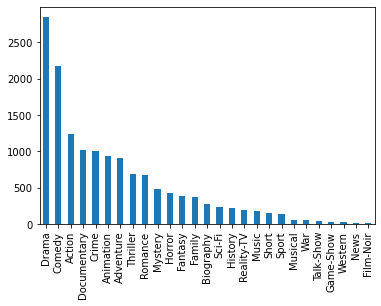

In [16]:
#Netflix Genres

data_genres = cleaned_data.iloc[:, 13:]
_ = data_genres.sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

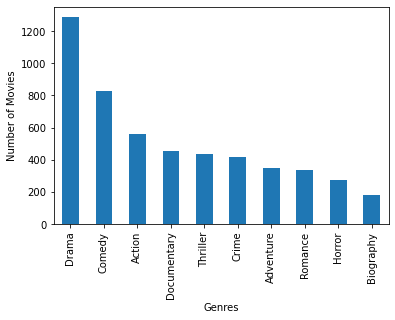

In [17]:
#Top 10 Genres of Movies

_ = cleaned_data[cleaned_data['type'] == 'movie'].iloc[:, 13:].sum().sort_values(ascending=False).head(10).plot(kind='bar')
_ = plt.xlabel('Genres')
_ = plt.ylabel('Number of Movies')
plt.show()

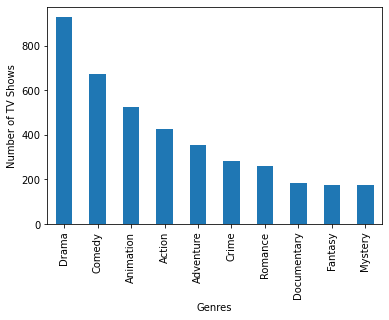

In [18]:
#Top 10 Genres of TV Shows

_ = cleaned_data[cleaned_data['type'] == 'tvSeries'].iloc[:, 13:].sum().sort_values(ascending=False).head(10).plot(kind='bar')
_ = plt.xlabel('Genres')
_ = plt.ylabel('Number of TV Shows')
plt.show()

In [19]:
top_show_genres = set(cleaned_data[cleaned_data['type'] == 'tvSeries'].iloc[:, 13:].sum().sort_values(ascending=False).head(10).index)
top_movie_genres = set(cleaned_data[cleaned_data['type'] == 'movie'].iloc[:, 13:].sum().sort_values(ascending=False).head(10).index)

print('Top Genres for both Movies & TV Shows:', top_show_genres.intersection(top_movie_genres))
print('Top Genres for TV Shows but not Movies:', top_show_genres.difference(top_movie_genres))
print('Top Genres for Movies but not TV Shows:', top_movie_genres.difference(top_show_genres))

Top Genres for both Movies & TV Shows: {'Action', 'Adventure', 'Comedy', 'Drama', 'Romance', 'Documentary', 'Crime'}
Top Genres for TV Shows but not Movies: {'Fantasy', 'Animation', 'Mystery'}
Top Genres for Movies but not TV Shows: {'Horror', 'Biography', 'Thriller'}


In [20]:
#Top genres for TV shows and movies differ - animated TV shows are popular, but not animated movies, which makes sense,
#since there are a lot of adult animated shows.
#Conversely, thriller titles are much more prominent in movies than for TV shows.

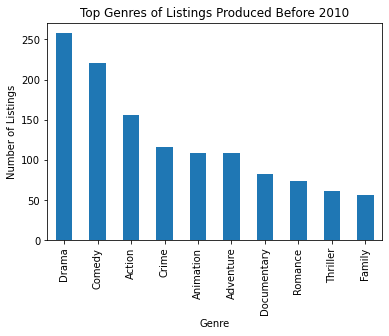

In [21]:
#Analyze the genres of listings produced before 2010 and after 2010

top_genres_before_2010 = cleaned_data[cleaned_data['startYear'] <= 2010].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_genres_before_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of Listings')
_ = plt.title('Top Genres of Listings Produced Before 2010')
plt.show()

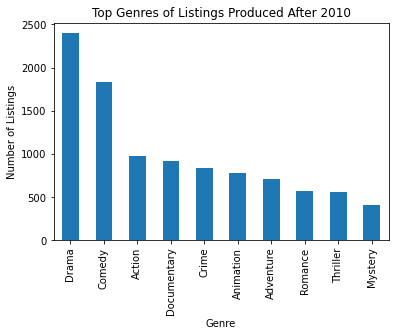

In [22]:
top_genres_after_2010 = cleaned_data[cleaned_data['startYear'] > 2010].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_genres_after_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of Listings')
_ = plt.title('Top Genres of Listings Produced After 2010')
plt.show()

In [23]:
#Although there are many more titles produced after 2010 that are listed on Netflix, surprisingly, the top genres are very 
#similar. It looks like there is an increase in documentaries in the last decade (ranking went up from 7 to 4), 
#and a decrease in family listings (disappeared from top 10).

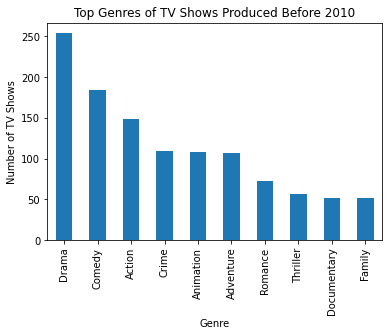

In [24]:
#Taking a closer look at genres of movies and TV shows across the years

top_tv_genres_before_2010 = cleaned_data[(cleaned_data['startYear'] <= 2010) & (cleaned_data['type'] <= 'tvSeries')].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_tv_genres_before_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of TV Shows')
_ = plt.title('Top Genres of TV Shows Produced Before 2010')
plt.show()

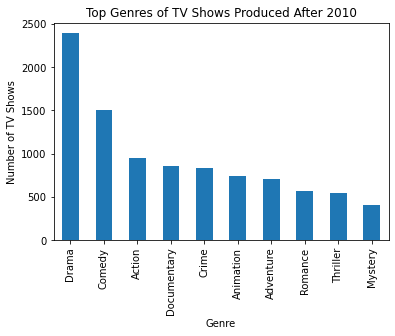

In [25]:
top_tv_genres_after_2010 = cleaned_data[(cleaned_data['startYear'] > 2010) & (cleaned_data['type'] <= 'tvSeries')].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_tv_genres_after_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of TV Shows')
_ = plt.title('Top Genres of TV Shows Produced After 2010')
plt.show()

In [26]:
#The trend of TV shows follows the same trend as overall listings, with an increase in documentaries and decrease in 
#family shows.

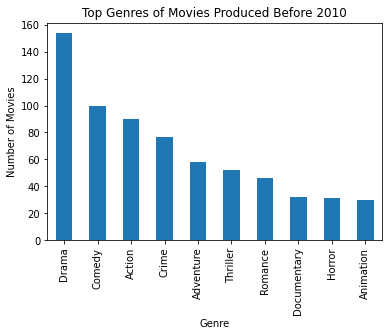

In [27]:
top_movie_genres_before_2010 = cleaned_data[(cleaned_data['startYear'] <= 2010) & (cleaned_data['type'] <= 'movie')].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_movie_genres_before_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of Movies')
_ = plt.title('Top Genres of Movies Produced Before 2010')
plt.show()

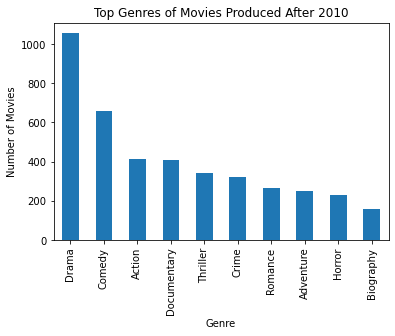

In [28]:
top_movie_genres_after_2010 = cleaned_data[(cleaned_data['startYear'] > 2010) & (cleaned_data['type'] <= 'movie')].iloc[:, 13:].sum().sort_values(ascending=False).head(10)
_ = top_movie_genres_after_2010.plot(kind='bar')
_ = plt.xlabel('Genre')
_ = plt.ylabel('Number of Movies')
_ = plt.title('Top Genres of Movies Produced After 2010')
plt.show()

In [29]:
#The trend of movies is slightly different from that of TV shows. There is still a large increase in documentaries, but
#we also see an increase in thriller films, and a decrease in crime and adventure films. Animation films disappear completely
#from the top 10 and is replaced by biography films.

In [30]:
#Overall, the top genres of listings are similar across the years, with more variance in movies than in TV shows. The main 
#difference is in the amount of documentaries offered on Netflix (both film and TV shows), which rose heavily over the 
#last 10 years. Although there are more movies offered on Netflix than TV shows, the overall trend of top genres over 
#the years is more similar to the trend of TV shows. 

#The hypothesis that there is an increase in science fiction titles was incorrect, and it is also not in the top 10 genres
#offered on Netflix.

#Most of the top genres between movies and TV shows are the same, with a couple of exceptions, namely animation genre 
#for TV shows (rank 3), and thriller genre for movies (rank 5).